# A study of the built-in samplers

In [1]:
import pypesto
import petab

# import to petab
petab_problem = petab.Problem.from_yaml(
    "conversion_reaction/conversion_reaction.yaml")
# import to pypesto
importer = pypesto.PetabImporter(petab_problem)
# create problem
problem = importer.create_problem()

In [2]:
result = pypesto.minimize(problem, n_starts=10)

In [3]:
sampler = pypesto.MetropolisSampler({'std': 0.1})
result = pypesto.sample(problem, 1e3, sampler, result=result)

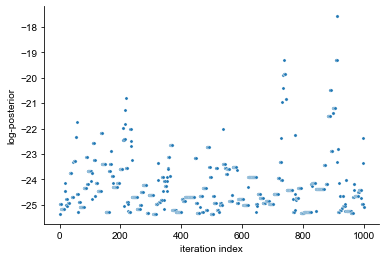

In [4]:
pypesto.visualize.sampling_fval_trace(
    result, i_chain=0, burn_in=0, stepsize=1, size=None)

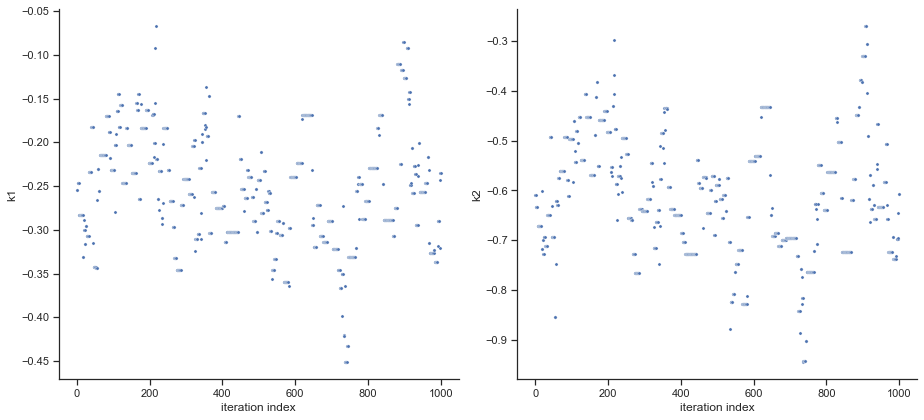

In [5]:
pypesto.visualize.sampling_parameters_trace(
    result, i_chain=0, burn_in=0, size=[13,6], use_problem_bounds=False)

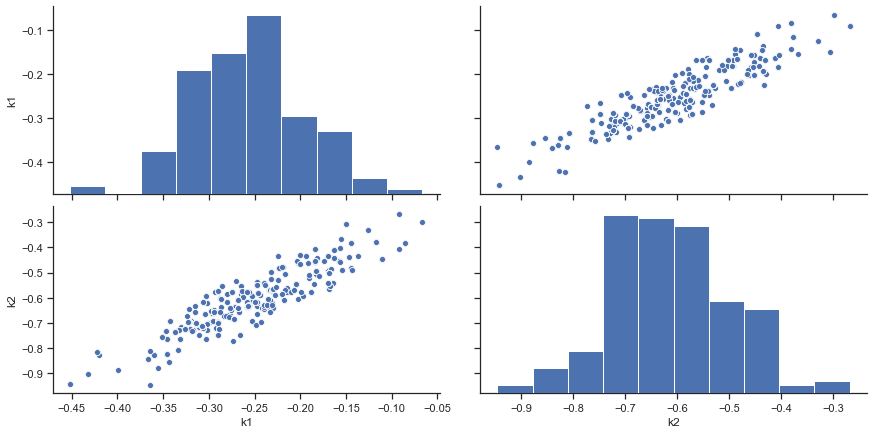

In [6]:
pypesto.visualize.sampling_scatter(
    result, i_chain=0, size=[13,6])

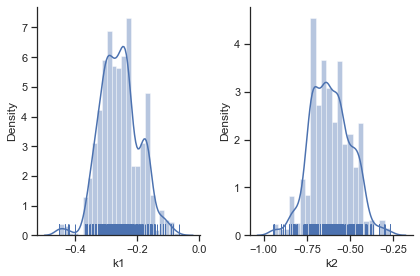

In [7]:
pypesto.visualize.sampling_1d_marginals(result)

In [8]:
print(result.optimize_result.get_for_key('x')[0])
print(result.optimize_result.get_for_key('fval')[0])
print(petab_problem.x_nominal_scaled)

[-0.25416784 -0.60834103]
-25.356202150094415
[-0.2231435513142097, -0.5108256237659907]


In [9]:
sampler = pypesto.ParallelTemperingSampler(
    internal_sampler=pypesto.MetropolisSampler({'std': 0.1}),
    betas=[1, 1e-1, 1e-2])
result = pypesto.sample(problem, 1e3, sampler, result=result)

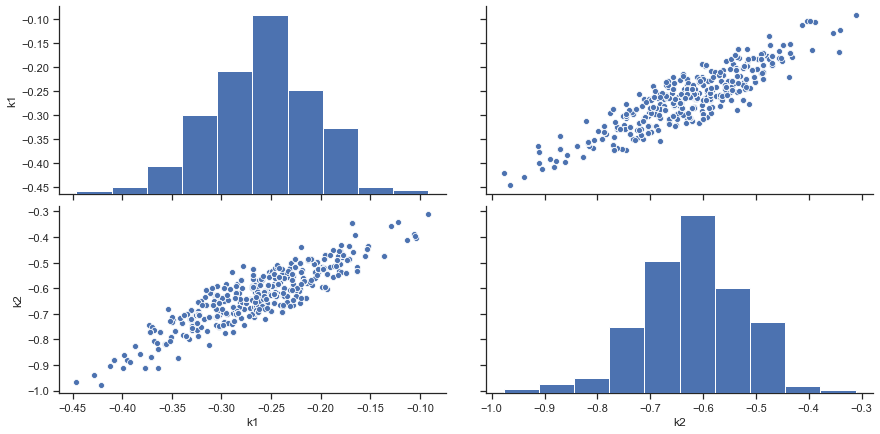

In [10]:
pypesto.visualize.sampling_scatter(result, size=[13,6])

[1.   0.1  0.01]


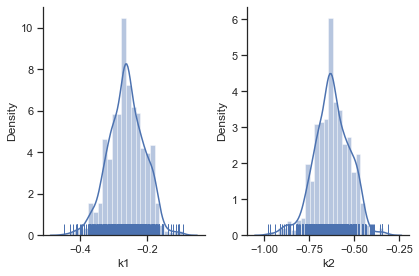

In [11]:
print(result.sample_result.betas)
pypesto.visualize.sampling_1d_marginals(result)

## 1-dim test problem

In [37]:
import numpy as np
from scipy.stats import multivariate_normal
import pypesto

def p(x):
    return - np.log(0.3*multivariate_normal.pdf(x, mean=-1.5, cov=0.1) + 0.7*multivariate_normal.pdf(x, mean=2.5, cov=0.2))
objective = pypesto.Objective(fun=p)
problem = pypesto.Problem(objective=objective, lb=np.array(-10), ub=np.array(10), x_names=['x'])

In [38]:
sampler = pypesto.MetropolisSampler({'std': 1})
result = pypesto.sample(problem, 1e4, sampler, x0=np.array([0.5]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcab0298850>]],
      dtype=object)

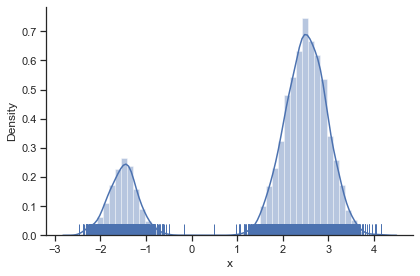

In [39]:
pypesto.visualize.sampling_1d_marginals(result)

In [40]:
sampler = pypesto.ParallelTemperingSampler(
    internal_sampler=pypesto.MetropolisSampler({'std': 1}),
    betas=[1, 1e-1, 1e-2])
result = pypesto.sample(problem, 1e4, sampler, x0=np.array([0.5]))

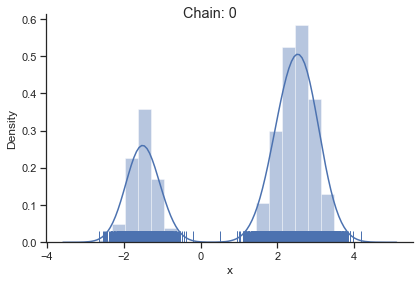

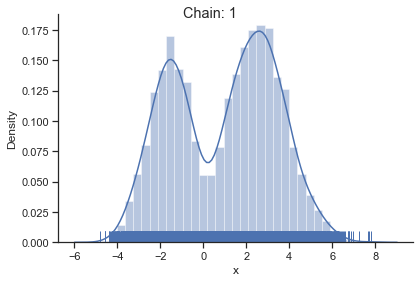

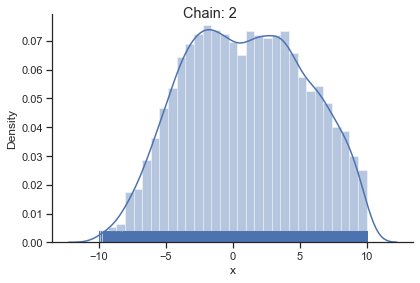

In [41]:
for i_chain in range(len(result.sample_result.betas)):
    pypesto.visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}")

In [42]:
sampler = pypesto.AdaptiveMetropolisSampler()
result = pypesto.sample(problem, 1e4, sampler, x0=np.array([0.5]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcab0d54350>]],
      dtype=object)

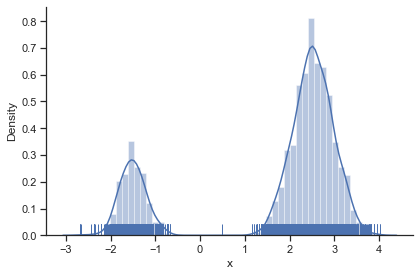

In [18]:
pypesto.visualize.sampling_1d_marginals(result)

In [19]:
sampler = pypesto.ParallelTemperingSampler(
    internal_sampler=pypesto.AdaptiveMetropolisSampler(),
    betas=[1, 1e-1, 1e-2])
result = pypesto.sample(problem, 1e4, sampler, x0=np.array([0.5]))

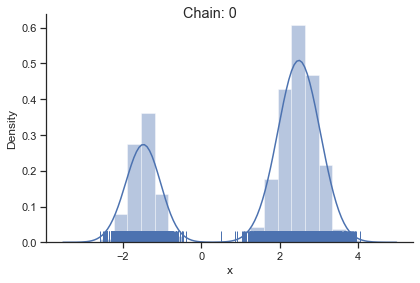

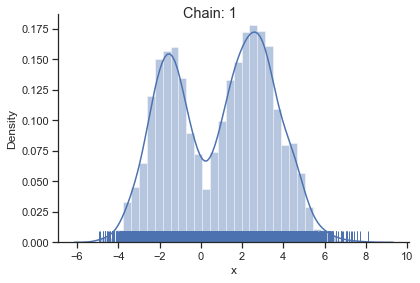

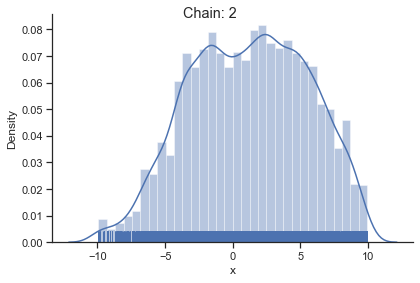

In [20]:
for i_chain in range(len(result.sample_result.betas)):
    pypesto.visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}")

In [24]:
sampler = pypesto.AdaptiveParallelTemperingSampler(
    internal_sampler=pypesto.AdaptiveMetropolisSampler(), n_chains=3)
result = pypesto.sample(problem, 1e4, sampler, x0=np.array([0.5]))

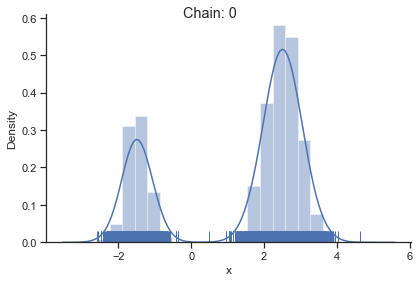

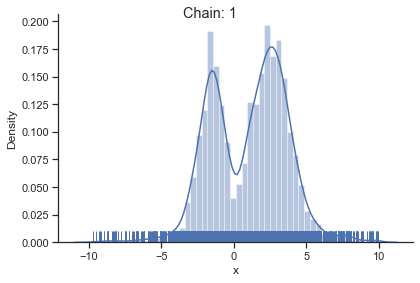

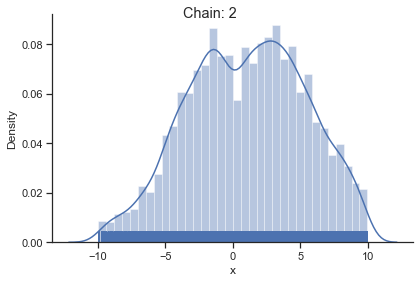

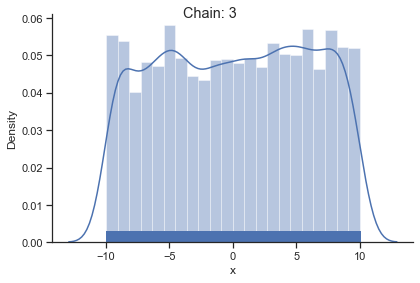

In [22]:
for i_chain in range(len(result.sample_result.betas)):
    pypesto.visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}")

In [23]:
result.sample_result.betas

array([1.00000000e+00, 1.85554051e-01, 2.23186917e-02, 2.00000000e-05])

## 2-dim test problem: Rosenbrock banana

In [26]:
import scipy.optimize as so
import pypesto

# first type of objective
objective = pypesto.Objective(fun=so.rosen)

dim_full = 2
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

In [31]:
sampler = pypesto.AdaptiveParallelTemperingSampler(
    internal_sampler=pypesto.AdaptiveMetropolisSampler(), n_chains=10)
result = pypesto.sample(problem, 1e4, sampler, x0=np.array([0, 0]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcab1509d90>,
      dtype=object)

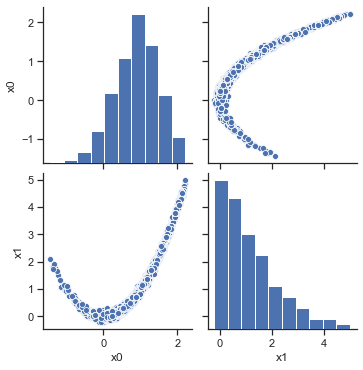

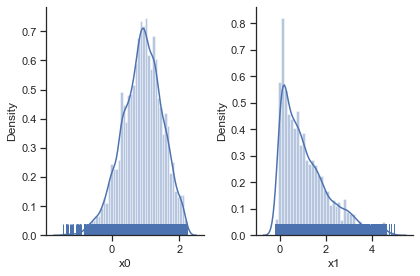

In [32]:
pypesto.visualize.sampling_scatter(result)
pypesto.visualize.sampling_1d_marginals(result)